# Unit 5 | Assignment - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations.

# Pyber

![Ride](Ride.png)
The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

1. Average Fare ($) Per City
2. Total Number of Rides Per City
3. Total Number of Drivers Per City
4. City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

- You must use the Pandas Library and the Jupyter Notebook.
- You must use the Matplotlib library.
- You must include a written description of three observable trends based on the data.
- You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
- Remember when making your plots to consider aesthetics!
- You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
- When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
- When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_df = "city_data.csv"
ride_df = "ride_data.csv"

# Read the City
city_data = pd.read_csv(city_df)
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Read Ride Data
ride_data = pd.read_csv(ride_df)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
merged_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# make a copy of original dataframe and group by city and type
merged_copy = merged_df.copy()
city_types = merged_copy.groupby(["type","city"])

# get total rides by counting the total rides per type and then city
total_rides = pd.DataFrame(city_types["ride_id"].count())
# x_axis will be the count of ride_id per type
urban_rides = total_rides.loc["Urban"]
urban_x = urban_rides["ride_id"]

rural_rides = total_rides.loc["Rural"]
rural_x = rural_rides["ride_id"]

suburban_rides = total_rides.loc["Suburban"]
suburban_x = suburban_rides["ride_id"]


# get the average fare finding the average fare per type and then city
average_fare = pd.DataFrame(city_types["fare"].mean())

# y_axis will be the average fair per type
urban_fare = average_fare.loc["Urban"]
urban_y = urban_fare["fare"]

rural_fare = average_fare.loc["Rural"]
rural_y = rural_fare["fare"]

suburban_fare = average_fare.loc["Suburban"]
suburban_y = suburban_fare["fare"]



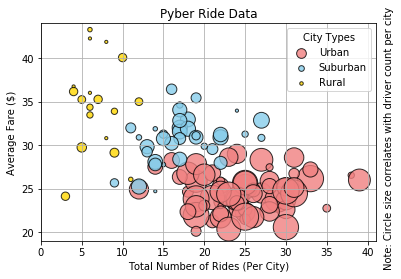

In [5]:
# circle size will be count of drivers per city
driver_count = pd.DataFrame(city_types["driver_count"].unique())
driver_count_index = pd.DataFrame(driver_count.reset_index())

urban_size = 10*(driver_count_index["driver_count"].loc[driver_count_index["type"]
                                                        =="Urban"].astype("int64"))
suburban_size =10*(driver_count_index["driver_count"].loc[driver_count_index["type"]
                                                          =="Suburban"].astype("int64"))
rural_size = 10*(driver_count_index["driver_count"].loc[driver_count_index["type"]
                                                        =="Rural"].astype("int64"))

# Build the scatter plots for each city types
urban = plt.scatter(urban_x,urban_y,edgecolor="black",facecolor = "lightcoral",
            alpha = 0.80,label="Urban",s=urban_size, linewidths=1)
suburban = plt.scatter(suburban_x, suburban_y, edgecolor="black",facecolor = "skyblue",
            alpha = 0.80,label="Suburban",s=suburban_size,linewidths=1)
rural = plt.scatter(rural_x, rural_y,edgecolor="black",facecolor = "gold",
            alpha = 0.80,label="Rural",s=rural_size,linewidths=1)

plt.legend(handles=(urban,suburban,rural),labels=("Urban","Suburban","Rural"),
           markerscale=0.5, title="City Types")

# Incorporate the other graph properties
plt.grid()
plt.xlim(0,41)
plt.ylim(19,44)

# Create a labels
plt.title("Pyber Ride Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
note = "Note: Circle size correlates with driver count per city"
plt.text(42,45, note, rotation=90)
# Save Figure
plt.savefig("bubble_plot.png")

# Show plot
plt.show()

In [6]:
pie_df = merged_df.copy()
pie_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Total Fares by City Type

In [7]:
# Calculate Ride Percents

total_urban_fare = (pie_df["fare"].loc[pie_df["type"]=="Urban"]).sum()
total_suburban_fare = (pie_df["fare"].loc[pie_df["type"]=="Suburban"]).sum()
total_rural_fare =(pie_df["fare"].loc[pie_df["type"]=="Rural"]).sum()

fares = [total_urban_fare, total_rural_fare, total_suburban_fare]
city_type = ["Urban", "Rural","Suburban"]
explode = [0.1,0,0]
colors = ["lightcoral","gold","skyblue"]


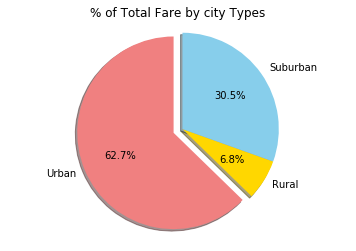

In [8]:
# Show Figure
plt.pie(fares, explode=explode, labels=city_type, colors=colors,shadow=True,
        autopct="%1.1f%%",startangle=90)
plt.axis("equal")
plt.title("% of Total Fare by city Types")
# Save Figure
plt.savefig("fare_by_city_type.png")

## Total Rides by City Type

In [9]:
# Calculate Ride Percents
total_urban_ride = (pie_df["ride_id"].loc[pie_df["type"]=="Urban"]).count()
total_suburban_ride = (pie_df["ride_id"].loc[pie_df["type"]=="Suburban"]).count()
total_rural_ride =(pie_df["ride_id"].loc[pie_df["type"]=="Rural"]).count()

types = [total_urban_ride, total_rural_ride, total_suburban_ride]
city_type = ["Urban", "Rural","Suburban"]
explode = [0.1,0,0]
colors = ["lightcoral","gold","skyblue"]



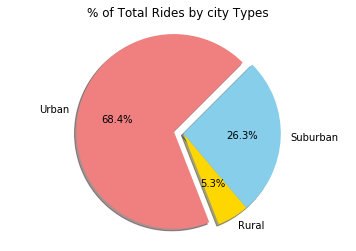

In [10]:
# Show Figure
plt.pie(types, explode=explode, labels=city_type, colors=colors,shadow=True,
        autopct="%1.1f%%",startangle=45)
plt.axis("equal")
plt.title("% of Total Rides by city Types")
# Save Figure
plt.savefig("ride_by_city_type.png")

## Total Drivers by City Type

In [11]:
drivers = pie_df.copy()
total_drivers = drivers.groupby(["type","city"])
drivers_df = (pd.DataFrame(total_drivers["driver_count"].unique())).reset_index()

total_urban_drivers = (drivers_df["driver_count"].loc[drivers_df["type"]=="Urban"]).sum()
total_suburban_drivers = (drivers_df["driver_count"].loc[drivers_df["type"]=="Suburban"]).sum()
total_rural_drivers =(drivers_df["driver_count"].loc[drivers_df["type"]=="Rural"]).sum()

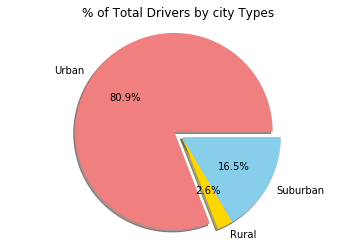

In [12]:
types = [total_urban_drivers, total_rural_drivers, total_suburban_drivers]
city_type = ["Urban", "Rural","Suburban"]
explode = [0.1,0,0]
colors = ["lightcoral","gold","skyblue"]
# Show Figure
plt.pie(types, explode=explode, labels=city_type, colors=colors,shadow=True,
        autopct="%1.1f%%",startangle=0)
        
plt.axis("equal")
plt.title("% of Total Drivers by city Types")
# Save Figure
plt.savefig("drivers_by_city_type.png")

# Observable Trends
1. It's observed that in Rural areas, there is a lack of available drivers. 
2. Rural drivers are in average making more money than drivers in Urban areas.
3. It would be advisable to focus Pyber in Rural and Suburban areas. 